# **The Needed** **Libraries**

In [1]:
# Core libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Data processing & visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Optional: for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Loading the dataset and Checking for the shape of the grayscale images**

In [2]:
from tensorflow.keras.datasets import mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print shapes to understand the data
print("Training data shape:", x_train.shape)   # (60000, 28, 28)
print("Test data shape:", x_test.shape)         # (10000, 28, 28)
print("Training labels shape:", y_train.shape)  # (60000,)
print("Test labels shape:", y_test.shape)       # (10000,)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Training labels shape: (60000,)
Test labels shape: (10000,)


# **Visualize sample images using matplotlib**

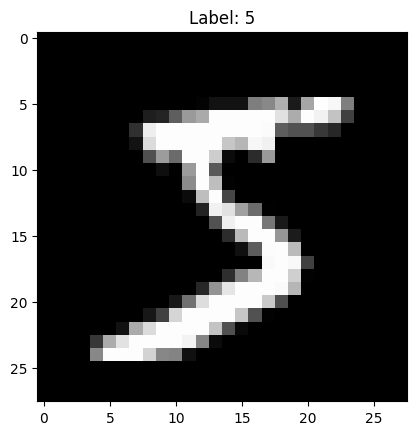

In [ ]:
import matplotlib.pyplot as plt

# Show first training image
plt.imshow(x_train[0], cmap='gray')
plt.title('Label: ' + str(y_train[0]))
plt.show()

# **Check class distribution (are all classes balanced?)**

In [ ]:
import numpy as np

# For training set
unique_train, counts_train = np.unique(y_train, return_counts=True)
print("Training set class distribution:")
for label, count in zip(unique_train, counts_train):
    print(f"Class {label}: {count} samples")

# For test set
unique_test, counts_test = np.unique(y_test, return_counts=True)
print("\nTest set class distribution:")
for label, count in zip(unique_test, counts_test):
    print(f"Class {label}: {count} samples")

Training set class distribution:
Class 0: 5923 samples
Class 1: 6742 samples
Class 2: 5958 samples
Class 3: 6131 samples
Class 4: 5842 samples
Class 5: 5421 samples
Class 6: 5918 samples
Class 7: 6265 samples
Class 8: 5851 samples
Class 9: 5949 samples

Test set class distribution:
Class 0: 980 samples
Class 1: 1135 samples
Class 2: 1032 samples
Class 3: 1010 samples
Class 4: 982 samples
Class 5: 892 samples
Class 6: 958 samples
Class 7: 1028 samples
Class 8: 974 samples
Class 9: 1009 samples


# **Visualize the Class Distribution (Optional but Recommended)**

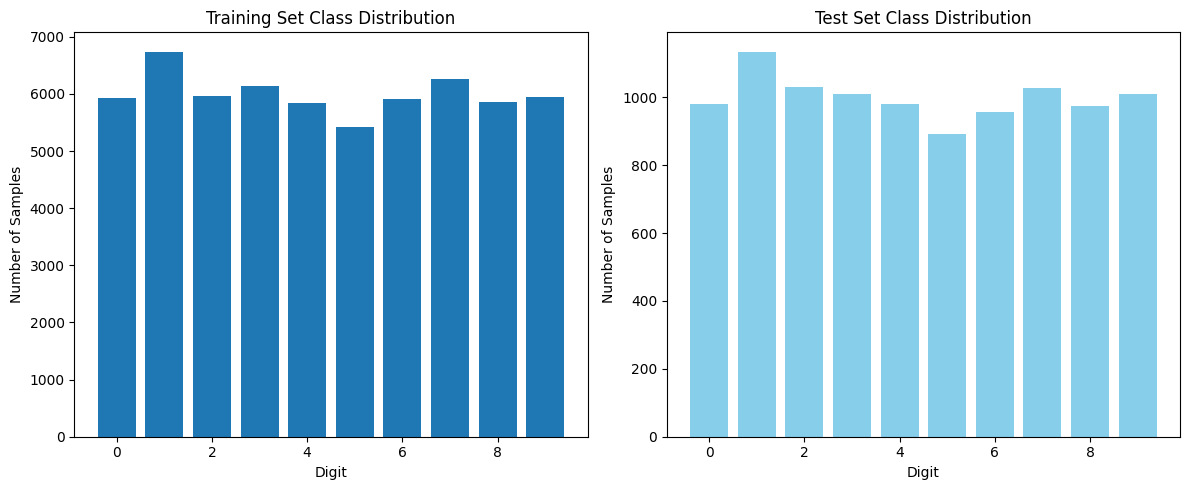

In [ ]:
import matplotlib.pyplot as plt

# Plotting training set
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.bar(unique_train, counts_train)
plt.title('Training Set Class Distribution')
plt.xlabel('Digit')
plt.ylabel('Number of Samples')

# Plotting test set
plt.subplot(1,2,2)
plt.bar(unique_test, counts_test, color='skyblue')
plt.title('Test Set Class Distribution')
plt.xlabel('Digit')
plt.ylabel('Number of Samples')

plt.tight_layout()
plt.show()

# **Normalize pixel values from [0, 255] to [0, 1]**

In [3]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
print("Min pixel value after normalization:", x_train.min())  # Should be 0.0
print("Max pixel value after normalization:", x_train.max())  # Should be 1.0

Min pixel value after normalization: 0.0
Max pixel value after normalization: 1.0


In [ ]:
import numpy as np

# Print some original pixel values (before normalization)
print("Original sample pixels:\n", x_train[:2].astype("uint8")[0])  # Before normalization

Original sample pixels:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 2

# **One-hot encode labels (for example: convert [5] → [0,0,0,0,0,1,0,0,0,0])**

In [4]:
# Assume y_train and y_test are your original labels
print("Before:", y_train[0])

# Convert to one-hot
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("After:", y_train[0])

Before: 5
After: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# **Add Channel Dimension:**

In Keras, convolutional layers like Conv2D expect input tensors in this format:
(batch_size, height, width, channels)


In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape)

(60000, 28, 28, 1)


Building the Model's Architecture

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    # Block 1
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    # Fully Connected Layers
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Load the saved model**

In [8]:
# Step 1: Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import libraries
from tensorflow.keras.models import load_model

# Step 3: Load model
model_path = '/content/drive/MyDrive/models/mnist_cnn_model.h5'
model = load_model(model_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Although MNIST is clean, adding small augmentations helps with generalization:**

In [9]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(x_train)

# **Visualizing the images before and after Data Augmentation**

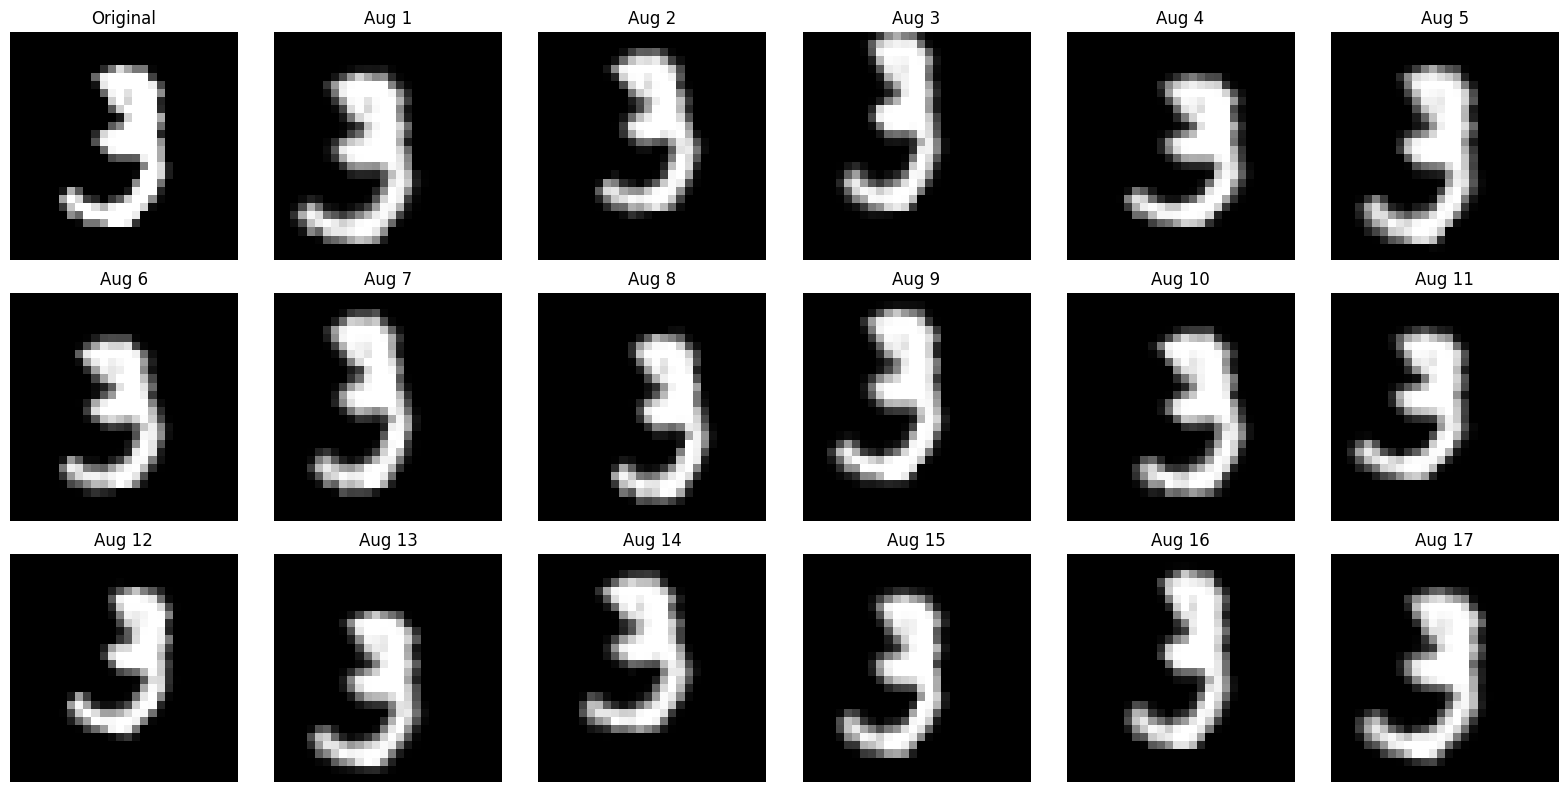

In [10]:
# Pick one image
image = x_train[10]
image_batch = np.expand_dims(image, axis=0)

# Create iterator
aug_iter = datagen.flow(image_batch, batch_size=1)

# Plot original + augmented images
fig, axes = plt.subplots(3, 6, figsize=(16, 8))
axes = axes.flatten()

# Show original image
axes[0].imshow(image[:, :, 0], cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

# Show augmented versions
for i in range(1, 18):
    batch = next(aug_iter)  # 👈 Fixed line
    image_aug = batch[0]
    axes[i].imshow(image_aug[:, :, 0], cmap='gray')
    axes[i].set_title(f'Aug {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# **Compile the Model**

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# **Train the Model**

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8821 - loss: 0.3925 - val_accuracy: 0.9855 - val_loss: 0.0471
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9801 - loss: 0.0652 - val_accuracy: 0.9902 - val_loss: 0.0322
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9844 - loss: 0.0495 - val_accuracy: 0.9913 - val_loss: 0.0270
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9861 - loss: 0.0449 - val_accuracy: 0.9893 - val_loss: 0.0326
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9873 - loss: 0.0395 - val_accuracy: 0.9915 - val_loss: 0.0302
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9896 - loss: 0.0342 - val_accuracy: 0.9935 - val_loss: 0.0249
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9904 - loss: 0.0307 - val_accuracy: 0.9930 - val_loss: 0.0254
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9908 - loss: 0.0302 - val_accuracy: 

In [ ]:
import os
import shutil

# Remove the existing drive folder
shutil.rmtree('/content/drive', ignore_errors=True)

# Recreate an empty directory
os.makedirs('/content/drive', exist_ok=True)

# Now mount again
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save model
model.save("/content/drive/MyDrive/models/mnist_cnn_model.h5")

# **Evaluation:**

In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9930 - loss: 0.0280


In [12]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [16]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# **Individual Prediction Plot**

In [18]:
def plot_individual_prediction(model, x_test, y_test_labels, index=None):

    # Pick a random image index if none provided
    if index is None:
        index = np.random.randint(0, len(x_test))

    # Get image and true label
    image = x_test[index]
    true_label = y_test_labels[index]

    # Add batch dimension and predict
    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_label = np.argmax(prediction)

    # Confidence score
    confidence = np.max(prediction)

    # Set up color and title based on correctness
    if predicted_label == true_label:
        color = "green"
        result = "Correct"
    else:
        color = "red"
        result = "Incorrect"

    # Plotting
    plt.figure(figsize=(4, 4))
    plt.imshow(image.squeeze(), cmap='gray' if image.shape[-1] == 1 else 'viridis')
    plt.title(f"True: {true_label}\nPredicted: {predicted_label} ({result})\nConfidence: {confidence*100:.2f}%", color=color)
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


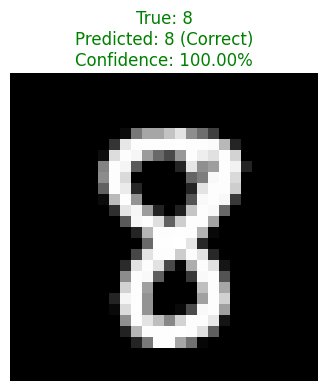

In [21]:
plot_individual_prediction(model, x_test, y_test_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


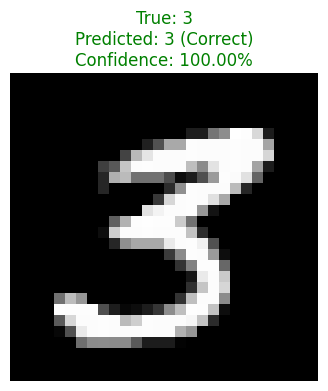

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


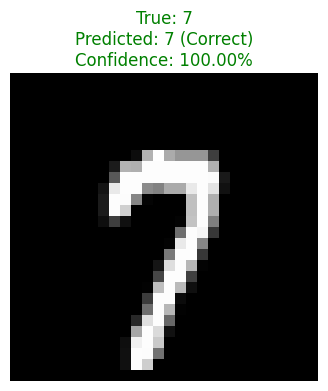

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


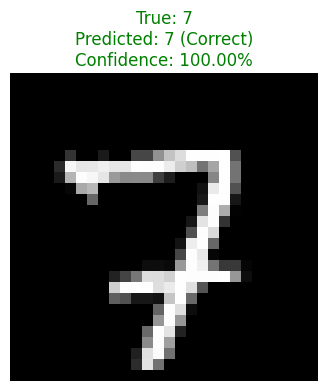

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


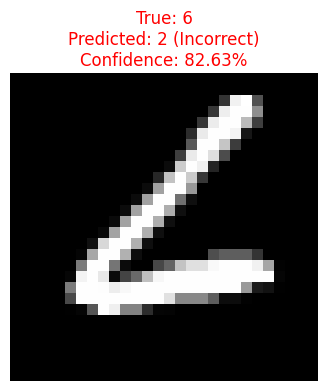

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


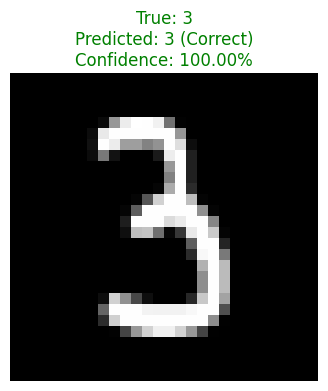

In [22]:
# Loop Through Multiple Images
for _ in range(5):
    plot_individual_prediction(model, x_test, y_test_labels)

# **Visualize a Grid of Predictions**

In [25]:
def plot_prediction_grid(model, x_test, y_test_labels, num_images=16):

    indices = np.random.choice(len(x_test), size=num_images, replace=False)
    images = x_test[indices]
    true_labels = y_test_labels[indices]

    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    confidences = np.max(predictions, axis=1)

    # Set up the grid
    num_rows = int(np.sqrt(num_images))
    num_cols = num_rows

    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray' if images[i].shape[-1] == 1 else 'viridis')
        plt.axis('off')

        # Determine correctness
        correct = predicted_labels[i] == true_labels[i]
        color = 'green' if correct else 'red'

        # Title with labels and confidence
        title = f"True: {true_labels[i]}\nPred: {predicted_labels[i]} ({'Correct' if correct else 'Incorrect'})\n{confidences[i]*100:.1f}%"
        plt.title(title, fontsize=8, color=color)

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


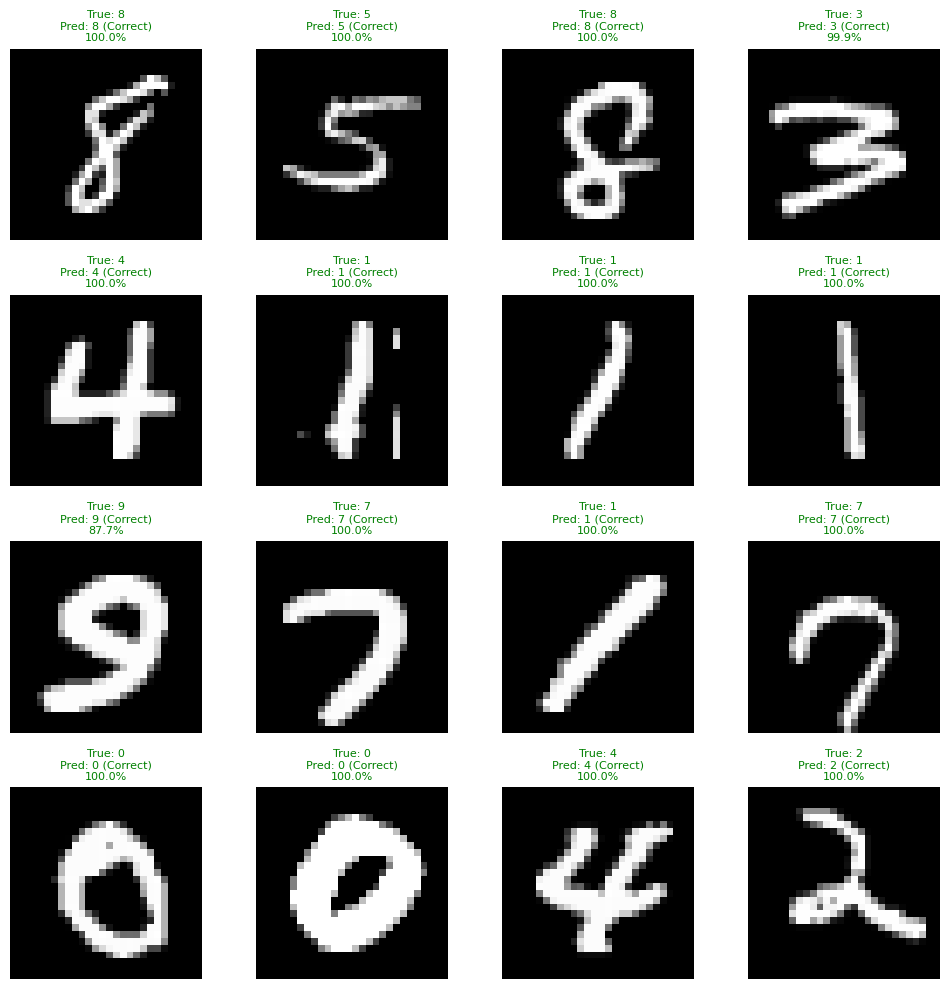

In [26]:
plot_prediction_grid(model, x_test, y_test_labels, num_images=16)

# **Confusion Matrix**

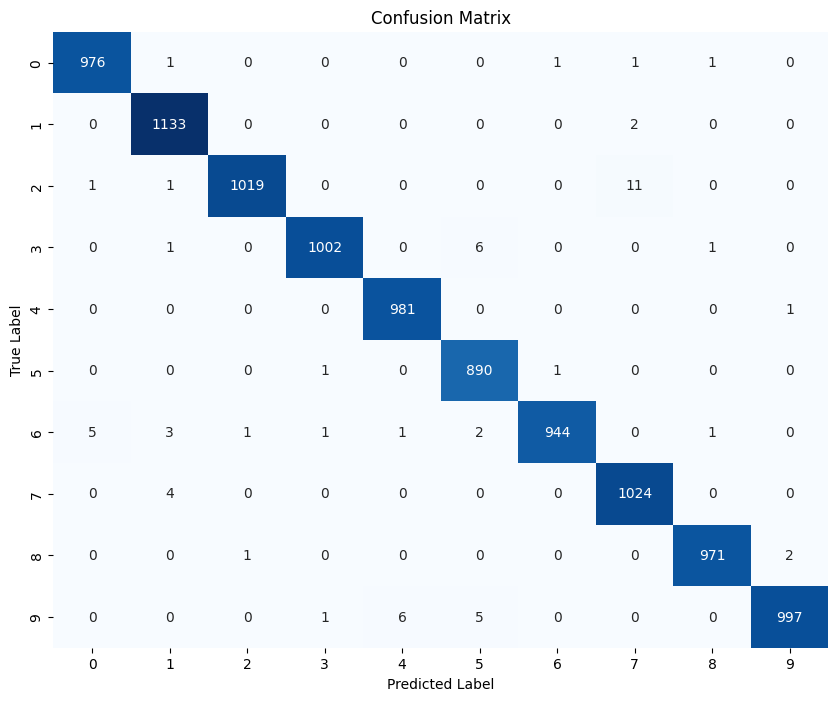


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      1.00      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      1.00      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

y_true = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix:
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

In [1]:
import os
# Create a directory for your project
project_dir = 'mnist-cnn'
os.makedirs(project_dir, exist_ok=True)

In [2]:
model.save(f'{project_dir}/model.h5')  # Save model as HDF5 file

NameError: name 'model' is not defined